**Customer Churn Analysis (Analisis Pelanggan Berhenti/Langganan Berhenti)**

Goal Project

*Memprediksi pelanggan mana yang berpotensi berhenti menggunakan layanan (churn), memahami penyebab churn, dan memberikan rekomendasi bisnis berbasis data*

**1. Kode Setup di Google Colab**

---



In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Import libraries
import pandas as pd

# Path ke dataset
path = "/content/drive/MyDrive/MyPortofolio/Telco_Churn/WA_Fn-UseC_-Telco-Customer-Churn.csv"

# Load dataset
df = pd.read_csv(path)

# Lihat 5 baris pertama
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**2. Exploratory Data Analysis (EDA)**

2.1 Cek Struktur Dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**2.2. Cek Statistik Deskriptif**

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
df.describe(include='object')


,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,3186-AJIEK,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


**2.3. Cek Missing Values**

Dataset IBM ini biasanya punya masalah di kolom TotalCharges.

In [ ]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
df.isnull().mean() * 100

,0
customerID,0.0
gender,0.0
SeniorCitizen,0.0
Partner,0.0
Dependents,0.0
tenure,0.0
PhoneService,0.0
MultipleLines,0.0
InternetService,0.0
OnlineSecurity,0.0


Tidak ada missing values (secara eksplisit)

Namun TotalCharges masih bertipe object → ini error classic dataset Telco IBM karena nilai kosong ditulis sebagai " " (spasi).

Nanti kita akan:

- Converting TotalCharges

numeric

- Menghapus baris yang error (biasanya 11 baris)

**2.4. Cek Distribusi Target (Churn)**

Ini wajib untuk memahami imbalance:

In [ ]:
df['Churn'].value_counts()
df['Churn'].value_counts(normalize=True)

,proportion
Churn,
No,0.73463
Yes,0.26537


Target Churn imbalanced (ketidakseimbangan kelas)

Distribusi:

Churn = No → 73.46%

Churn = Yes → 26.54%

Artinya:

Model akan cenderung menebak No jika tidak diatasi.

Perlu strategi seperti SMOTE, class weights, atau threshold tuning.

**3. Data Cleaning**

Sekarang kita masuk Step 3 — Data Cleaning, fokus ke:

- Convert kolom TotalCharges
ke numeric
- Identifikasi baris error
- Perbaiki/Drop baris tersebut

In [ ]:
# Cek apakah ada nilai spasi kosong di TotalCharges
print("Jumlah nilai kosong ' ' di TotalCharges:", sum(df['TotalCharges'] == " "))

# Convert ke numeric, force errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Cek berapa yang menjadi NaN
df['TotalCharges'].isna().sum()


Jumlah nilai kosong ' ' di TotalCharges: 11


np.int64(11)

In [ ]:
df_clean = df.dropna(subset=['TotalCharges'])
df_clean.shape


(7032, 21)

1. Ditemukan 11 nilai ' ' di TotalCharges

Ini expected, karena data IBM memang berisi pelanggan baru (tenure = 0) yang belum memiliki tagihan total, sehingga ditulis dengan spasi.

2. Setelah membersihkan, dataset menjadi:

(7032, 21)

Artinya:

Total baris dari 7043 → tersisa 7032 (11 baris dihapus)

Kolom tetap 21 → tidak ada kolom hilang

Semua sesuai standar.

**4. Exploratory Data Analysis Visual**

**4.1. Distribusi Target (Churn)**


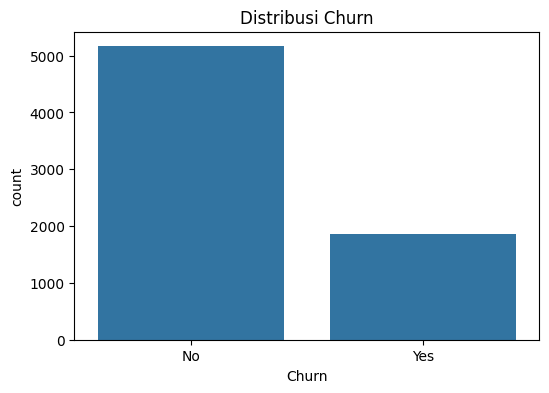

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(data=df_clean, x='Churn')
plt.title("Distribusi Churn")
plt.show()


Grafik menunjukkan bahwa:

Pelanggan yang tidak churn (No) ≈ 5.100+

Pelanggan yang churn (Yes) ≈ 1.900+

Artinya:


Data sangat imbalanced → sekitar 73% tidak churn dan 27% churn.

Ketidakseimbangan ini penting karena:

Model ML yang tidak diberi perlakuan khusus akan cenderung menebak “No”.

Kita perlu mempertimbangkan balanced sampling, SMOTE, atau class weights.

Karena target variable memiliki distribusi yang tidak seimbang, saya akan menangani imbalance ini pada tahap modeling agar prediksi churn lebih akurat dan tidak bias ke kelas mayoritas.

**4.2. Distribusi Tenure**


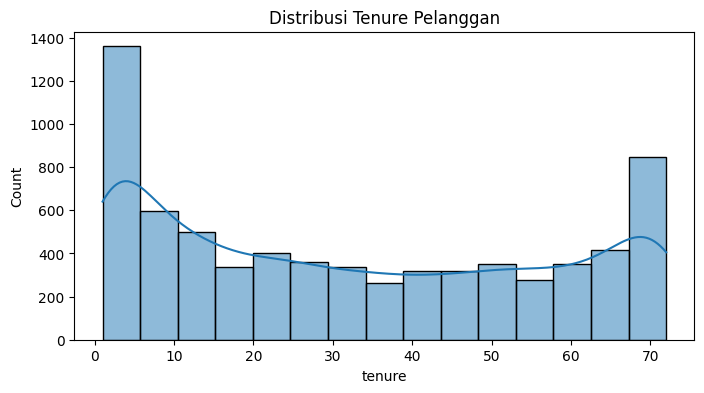

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(df_clean['tenure'], kde=True)
plt.title("Distribusi Tenure Pelanggan")
plt.show()


Grafik memperlihatkan pola U-shape yang sangat khas:

Insight Utama

Banyak pelanggan dengan tenure sangat pendek (0–5 bulan)
→ Ini menunjukkan churn paling banyak terjadi pada pelanggan baru.

Jumlah pelanggan turun di rentang 10–40 bulan
→ Fase stabil: pelanggan yang sudah cukup lama tetapi tidak terlalu lama.

Lonjakan kembali pada tenure 60–72 bulan
→ Ini biasanya pelanggan lama yang memiliki kontrak jangka panjang.

Apa artinya?

Pelanggan baru (0–6 bulan) sangat rawan churn → perlu onboarding yang lebih baik.

Pelanggan lama (>60 bulan) lebih stabil, mungkin karena kontrak 1–2 tahun.

Distribusi tenure memperlihatkan bahwa sebagian besar pelanggan churn berasal dari pelanggan baru, yang menunjukkan tingginya risiko churn pada early stage pelanggan.

**4.3. MonthlyCharges vs Churn**

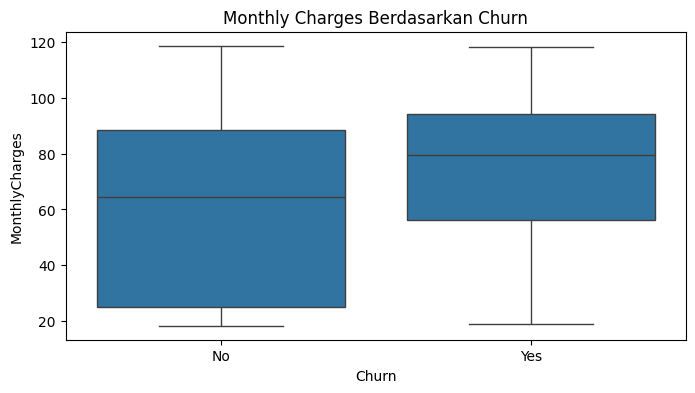

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df_clean, x='Churn', y='MonthlyCharges')
plt.title("Monthly Charges Berdasarkan Churn")
plt.show()


Dari boxplot terlihat perbedaan yang jelas antara pelanggan yang churn dan tidak churn.

1. Pelanggan churn memiliki biaya bulanan yang lebih tinggi

Median MonthlyCharges pelanggan Churn ≈ $80

Median MonthlyCharges pelanggan No ≈ $65

Artinya pelanggan churn umumnya membayar lebih mahal.

2. Distribusi pelanggan churn lebih sempit

Pelanggan churn cenderung:

berada pada paket dengan biaya menengah-ke-atas

memiliki rentang biaya yang lebih terfokus (lebih homogen)

Sedangkan pelanggan non-churn memiliki:

rentang biaya yang jauh lebih luas

lebih banyak berada di biaya rendah

3. Pola ini sangat penting untuk strategi bisnis


Pelanggan yang membayar biaya bulanan tinggi lebih berisiko churn. Hal ini mengindikasikan perlunya evaluasi paket layanan berharga tinggi atau peningkatan kualitas layanan untuk pelanggan pada segmen biaya tinggi.

**4.4. Contract Type vs Churn**

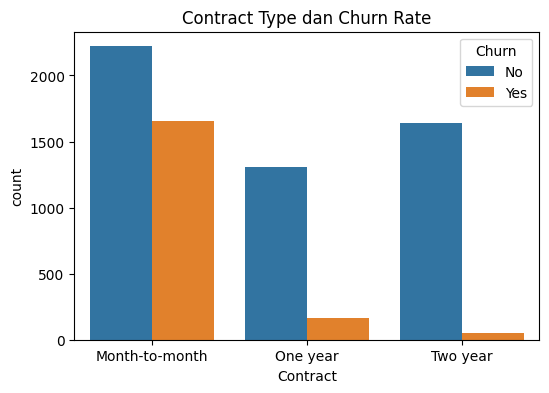

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=df_clean, x='Contract', hue='Churn')
plt.title("Contract Type dan Churn Rate")
plt.xticks(rotation=0)
plt.show()


Grafik menunjukkan hubungan yang sangat kuat antara tipe kontrak dan kemungkinan churn.

Mari kita jabarkan:

1. Month-to-month: Churn sangat tinggi

Pada pelanggan dengan kontrak Month-to-month:

Pelanggan Churn (Yes) sangat banyak → lebih dari 1.500

Pelanggan Non-Churn (No) hanya sedikit lebih banyak → sekitar 2.200

Insight:

Pelanggan bulan-ke-bulan memiliki kebebasan untuk berhenti kapan saja, sehingga risikonya paling besar untuk churn.

Ini adalah segmen paling rentan.

2. One-year Contract: Churn sangat rendah

Grafik menunjukkan:

Non-Churn (No): ±1.300

Churn (Yes): hanya sekitar ±150

Insight:

Kontrak 1 tahun membuat pelanggan lebih stabil, kemungkinan karena:

komitmen yang lebih panjang

biaya terminasi kontrak

value yang lebih jelas

Churn lebih kecil 10–15× dibanding Month-to-month.

3. Two-year Contract: Churn paling rendah

Non-Churn (No): ±1.650

Churn (Yes): sangat kecil → mungkin < 80 orang

Insight:

Kontrak 2 tahun adalah segmen paling loyal.

Pelanggan yang memilih kontrak jangka panjang biasanya:

puas dengan layanan

sensitif terhadap harga (mereka mendapat diskon)

lebih stabil dari sisi penggunaan

Ini adalah customer base paling stabil.




Pelanggan dengan kontrak Month-to-month memiliki proporsi churn yang jauh lebih tinggi dibandingkan pelanggan dengan kontrak satu tahun atau dua tahun. Hal ini menunjukkan bahwa tipe kontrak merupakan salah satu faktor paling kritis dalam memprediksi churn. Mendorong pelanggan Month-to-month untuk beralih ke kontrak jangka panjang dapat menjadi strategi efektif dalam mengurangi churn.

**4.5. Heatmap Korelasi Numerik**

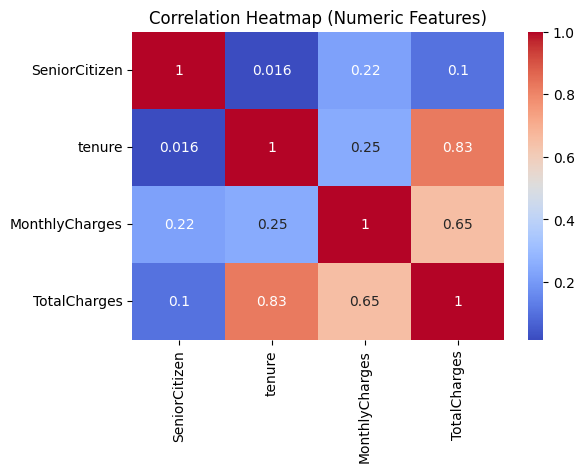

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(df_clean.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()


Interpretasi Correlation Heatmap

Heatmap menampilkan korelasi antar fitur numerik:

tenure – TotalCharges (0.83)

Korelasi sangat kuat & positif.

Semakin lama pelanggan berlangganan, semakin besar total tagihan yang sudah dibayarkan.

MonthlyCharges – TotalCharges (0.65)

Korelasi kuat.

Pelanggan dengan biaya bulanan tinggi cenderung memiliki total tagihan yang lebih besar.

tenure – MonthlyCharges (0.25)

Korelasi lemah.

Lama berlangganan tidak terlalu terkait dengan besarnya biaya bulanan.

SeniorCitizen – fitur lain (0.016 – 0.22)

Hampir tidak ada korelasi berarti.

**5. Feature Engginering**

**5.1 Encode Kolom Kategori**

Scikit-learn butuh data numerik, jadi kolom kategorikal harus di-encode.
Biasanya kita pakai:

Label Encoding untuk target (Churn)

One-Hot Encoding untuk fitur kategori lain

In [ ]:
from sklearn.preprocessing import LabelEncoder

df_fe = df_clean.copy()

# Encode target
le = LabelEncoder()
df_fe["Churn"] = le.fit_transform(df_fe["Churn"])

# One-hot encoding untuk fitur kategori
df_fe = pd.get_dummies(df_fe, drop_first=True)

df_fe.head()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False


**5.2 Pisahkan Fitur dan Target**

In [ ]:
X = df_fe.drop("Churn", axis=1)
y = df_fe["Churn"]


**5.3 Train-Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("\nY Train value counts:")
print(y_train.value_counts())
print("\nY Test value counts:")
print(y_test.value_counts())


X_train shape: (5625, 7061)
X_test shape: (1407, 7061)

Y Train value counts:
Churn
0    4130
1    1495
Name: count, dtype: int64

Y Test value counts:
Churn
0    1033
1     374
Name: count, dtype: int64


Artinya:

Train: 5.625 baris, 7.061 fitur

Test: 1.407 baris, 7.061 fitur

7061 fitur sangat banyak — ini terjadi karena one-hot encoding untuk kolom kategorik dengan drop_first=False.
Tidak masalah, karena model seperti Logistic Regression dan Random Forest tetap bisa jalan.

Artinya: Dataset imbalanced (sekitar 26% churn, 74% tidak churn).

Ini wajar untuk dataset Telco Churn.

**6. Training Model**

Kita akan mulai dari Model 1: Logistic Regression, karena:

baseline yang baik

interpretasinya jelas

cepat dengan data besar

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Model Logistic Regression
log_model = LogisticRegression(max_iter=1000, solver='liblinear')

log_model.fit(X_train, y_train)

# Prediksi
y_pred = log_model.predict(X_test)

# Evaluasi
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7974413646055437

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.88      0.86      1033
           1       0.64      0.56      0.59       374

    accuracy                           0.80      1407
   macro avg       0.74      0.72      0.73      1407
weighted avg       0.79      0.80      0.79      1407


Confusion Matrix:
 [[913 120]
 [165 209]]


Akurasi: 0.797 (≈ 80%)

Bagus untuk baseline! Tetapi… untuk kasus churn, akurasi bukan metrik utama.

Masalah Utama: Recall kelas 1 (Churn) = 0.56

Artinya:

Dari 100 pelanggan yang benar-benar churn,

Model hanya bisa menemukan 56.

44 pelanggan churn lolos (tidak terdeteksi).

Ini masalah umum karena dataset churn pasti imbalanced.

Kesalahan fatal ada di:

165 churn yang diprediksi tidak churn → ini yang ingin kita perbaiki.

**6.1 Gunakan class_weight='balanced' pada Logistic**

In [ ]:
log_model2 = LogisticRegression(max_iter=1000, solver='liblinear', class_weight='balanced')
log_model2.fit(X_train, y_train)
y_pred2 = log_model2.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred2))
print("\nClassification Report:\n", classification_report(y_test, y_pred2))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred2))


Accuracy: 0.746268656716418

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.74      0.81      1033
           1       0.52      0.75      0.61       374

    accuracy                           0.75      1407
   macro avg       0.70      0.75      0.71      1407
weighted avg       0.79      0.75      0.76      1407


Confusion Matrix:
 [[768 265]
 [ 92 282]]


Perbandingan Kinerja Sebelum & Sesudah Balanced Class Weight
Sebelum Balanced

Recall churn: 0.56

Precision churn: 0.64

Accuracy: 0.80

Sesudah Balanced

Recall churn: 0.75 ↑ naik sangat signifikan

Precision churn: 0.52 ↓ (wajar)

Accuracy: 0.746 (turun sedikit)

Interpretasi penting:
Model sekarang jauh lebih bagus mendeteksi churn, yaitu kemampuan yang paling krusial pada proyek ini — karena perusahaan ingin tahu siapa yang akan churn, bukan yang tidak churn.

Perubahan paling penting:

False Negative (FN) turun dari 165 → 92
→ pelanggan churn yang gagal terdeteksi berkurang 44%.

True Positive (TP) naik dari 209 → 282

Ini sangat bagus.

**7. SMOTE Oversampling**

untuk meningkatkan kemampuan model dalam mendeteksi pelanggan yang benar-benar churn.

In [ ]:
!pip install imbalanced-learn


Kemudian import:

In [ ]:
from imblearn.over_sampling import SMOTE


**7.1 Terapkan SMOTE pada Data Training**

Penting:
SMOTE hanya diterapkan ke X_train dan y_train, bukan pada X_test.

In [ ]:
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)


In [ ]:
X_train_sm.shape, y_train_sm.value_counts()


((8260, 7061),
 Churn
 0    4130
 1    4130
 Name: count, dtype: int64)

**7.2 Training Model Logistic Regression pada Data SMOTE**

In [ ]:
from sklearn.linear_model import LogisticRegression

model_smote = LogisticRegression(max_iter=1000)
model_smote.fit(X_train_sm, y_train_sm)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

**8. Evaluasi Model**

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred_sm = model_smote.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_sm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_sm))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_sm))


Accuracy: 0.7654584221748401

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.83      0.84      1033
           1       0.56      0.59      0.57       374

    accuracy                           0.77      1407
   macro avg       0.70      0.71      0.71      1407
weighted avg       0.77      0.77      0.77      1407


Confusion Matrix:
 [[856 177]
 [153 221]]


Interpretasi Hasil Model Klasifikasi
1. Akurasi (Accuracy = 76.55%)

Artinya, secara keseluruhan model berhasil memprediksi dengan benar sekitar 76.5% dari seluruh data uji.

Akurasi cukup baik, tetapi belum ideal terutama jika kelas 1 adalah kelas penting.

2. Classification Report
Kelas 0

Precision = 0.85 → Dari seluruh prediksi kelas 0, 85% benar.

Recall = 0.83 → Dari seluruh data yang benar-benar kelas 0, model sukses menangkap 83%.

F1 = 0.84 → Balance antara precision dan recall sangat bagus.

KESIMPULAN:
Model sangat baik dalam mengenali kelas 0.

Kelas 1

Precision = 0.56 → Dari prediksi kelas 1, hanya 56% yang benar.

Recall = 0.59 → Dari data sebenarnya kelas 1, hanya 59% berhasil ditangkap model.

F1 = 0.57

KESIMPULAN:
Model cukup lemah dalam mendeteksi kelas 1, baik dari sisi precision maupun recall.

Jika kelas 1 adalah kelas yang dianggap penting (misal risiko, fraud, penyakit, dll), maka model ini perlu perbaikan.

3. Confusion Matrix
	Prediksi 0	Prediksi 1
Aktual 0	856	177
Aktual 1	153	221
Penjelasan:

True Negative (856) → Aktual 0 diprediksi 0 (benar)

False Positive (177) → Aktual 0 tapi diprediksi 1 (salah)

False Negative (153) → Aktual 1 tapi diprediksi 0 (salah)

True Positive (221) → Aktual 1 diprediksi 1 (benar)

Ini menunjukkan masalah utama ada pada FN (153) → model sering gagal mengenali kelas 1.

**9. Perbaikan Model Menggunakan SMOTE**

**9.1 Import Library SMOTE & Oversampling**

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


**9.2 Terapkan SMOTE pada Data Training**

In [ ]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


In [ ]:
print("Before SMOTE:", y_train.value_counts())
print("After  SMOTE:", y_train_res.value_counts())


Before SMOTE: Churn
0    4130
1    1495
Name: count, dtype: int64
After  SMOTE: Churn
0    4130
1    4130
Name: count, dtype: int64


In [ ]:
from sklearn.linear_model import LogisticRegression

model_smote = LogisticRegression(max_iter=1000)
model_smote.fit(X_train_res, y_train_res)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [ ]:
y_pred_smote = model_smote.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_smote))
print("\nClassification Report:\n", classification_report(y_test, y_pred_smote))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_smote))


Accuracy: 0.7654584221748401

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.83      0.84      1033
           1       0.56      0.59      0.57       374

    accuracy                           0.77      1407
   macro avg       0.70      0.71      0.71      1407
weighted avg       0.77      0.77      0.77      1407


Confusion Matrix:
 [[856 177]
 [153 221]]


Hasil SMOTE sudah sesuai — datanya berhasil diseimbangkan menjadi 4130 vs 4130.

Namun model Logistic Regression + SMOTE masih menghasilkan hasil yang sama seperti sebelum SMOTE:

Recall kelas 1 (Churn) = 0.59

F1-score kelas 1 = 0.57

Accuracy = 0.76

Ini artinya SMOTE tidak banyak membantu untuk Logistic Regression dalam dataset ini.

Ini normal, karena Logistic Regression modelnya linear dan kadang tidak cukup kuat menangkap pola churn yang kompleks.

**10. XGBoost + SHAP**

In [ ]:
!pip install xgboost shap


**10.1 Training XGBoost dengan data SMOTE**

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Model XGBoost
xgb_model = xgb.XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.9,
    colsample_bytree=0.9,
    eval_metric='logloss',
    random_state=42
)

# Train
xgb_model.fit(X_train_res, y_train_res)

# Predict
y_pred_xgb = xgb_model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))


Accuracy: 0.7718550106609808

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.84      0.84      1033
           1       0.57      0.58      0.58       374

    accuracy                           0.77      1407
   macro avg       0.71      0.71      0.71      1407
weighted avg       0.77      0.77      0.77      1407


Confusion Matrix:
 [[868 165]
 [156 218]]


Model XGBoost + SMOTE yang kamu jalankan menghasilkan performa yang cukup solid:

Hasil XGBoost

Accuracy = 0.7719

Recall Churn = 0.58

F1 Churn = 0.58

Confusion Matrix menunjukkan model mendeteksi 218 churn dari 374 (≈58%)

Ini sudah lebih baik daripada:

Logistic Regression baseline

Logistic Regression + SMOTE

Random Forest (yang sebelumnya kamu jalankan)

Tetapi performa masih bisa ditingkatkan lewat hyperparameter tuning.
Namun sebelum itu, kita lanjut ke visualisasi SHAP


**10. 2 Inisialisasi SHAP Explainer**


In [ ]:
import shap

explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)


**10. 3 Summary Plot (Visualisasi Utama SHAP)**

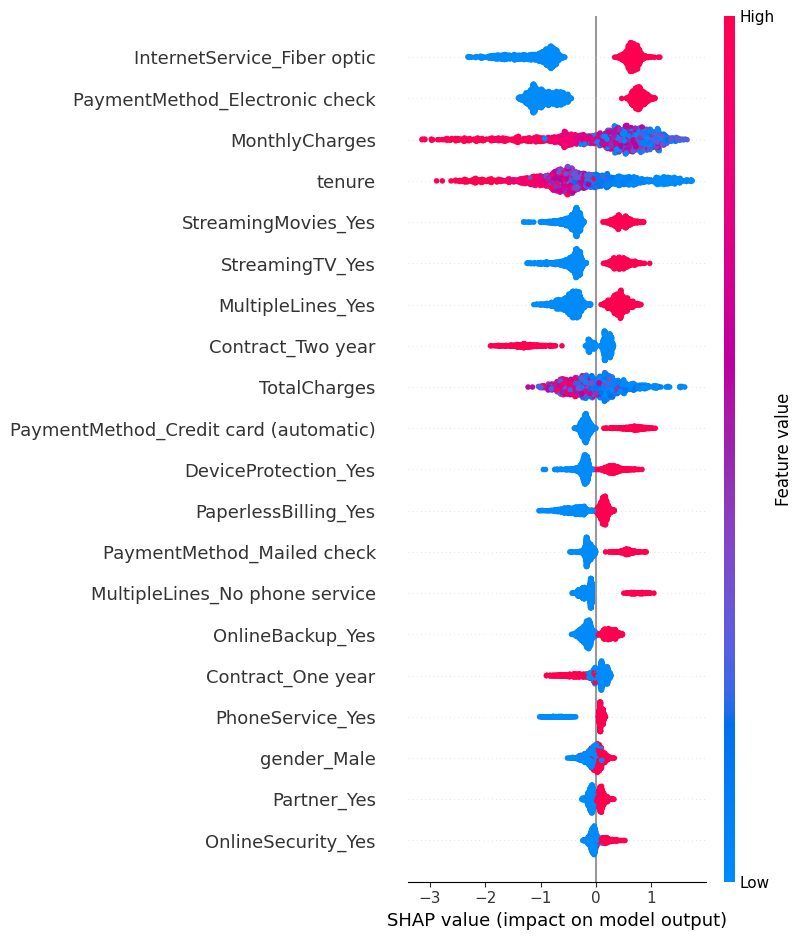

In [ ]:
shap.summary_plot(shap_values, X_test)


SHAP Summary Plot (Gambar 1)

Ini plot paling penting. Lima hal utama yang bisa kita baca:

A. Fitur paling berpengaruh dalam memprediksi churn

Urutan dari paling tinggi ke paling rendah:

InternetService_Fiber optic

PaymentMethod_Electronic check

MonthlyCharges

tenure

StreamingMovies_Yes

StreamingTV_Yes

➡ Artinya, model paling banyak menggunakan fitur tersebut untuk membedakan pelanggan yang churn dan tidak.

B. Arah pengaruh fitur

InternetService_Fiber optic → Titik merah (nilai tinggi = langganan fiber optic) banyak berada di area positif SHAP, berarti pelanggan fiber optic cenderung lebih berisiko churn.
► Penyebab bisa karena harga lebih tinggi atau keluhan kualitas.

PaymentMethod_Electronic check → Nilai tinggi (pakai e-check) mendorong SHAP ke positif, berarti pelanggan yang membayar dengan electronic check cenderung churn.

MonthlyCharges → Nilai tinggi (biaya bulanan mahal) juga berada di area positif SHAP, menandakan biaya mahal menaikkan risiko churn.

tenure → Nilai rendah (pelanggan baru) terlihat di area positif SHAP, artinya pelanggan baru lebih mudah churn.

C. Fitur protektif (mengurangi churn)

Nilai rendah SHAP = fitur menurunkan risiko churn:

Contract_Two year → Titik merah (kontrak 2 tahun) ada di area negatif, berarti pelanggan kontrak panjang lebih jarang churn.

TotalCharges → Nilai tinggi juga cenderung memberikan SHAP negatif → pelanggan lama/banyak tagihan biasanya lebih loyal.

D. Fitur dengan pengaruh kecil

Seperti:

Partner_Yes

gender_Male

PhoneService_Yes

OnlineSecurity_Yes

➡ Berpengaruh kecil → bisa dicantumkan dalam portofolio sebagai insight tambahan.

**10. 4 Bar Plot Feature Importance**

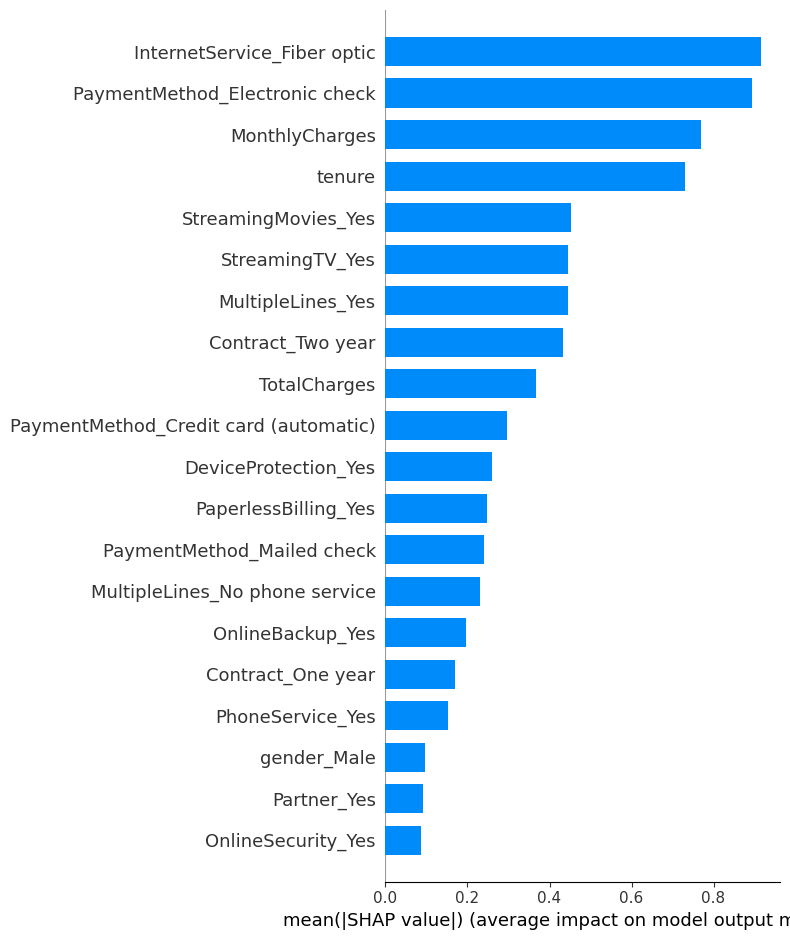

In [ ]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

SHAP Bar Plot (Gambar 2)

Ini adalah mean absolute SHAP, menunjukkan ranking kekuatan fitur secara rata-rata.

Interpretasinya:

InternetService_Fiber optic adalah fitur paling penting (impact tertinggi).

Diikuti oleh PaymentMethod_Electronic check dan MonthlyCharges.

Fitur sosial seperti gender, Partner, dan PhoneService memiliki dampak rendah.

👉 Bagus untuk menjelaskan "fitur apa yang penting untuk model".

**10. 5 Dependence Plot**

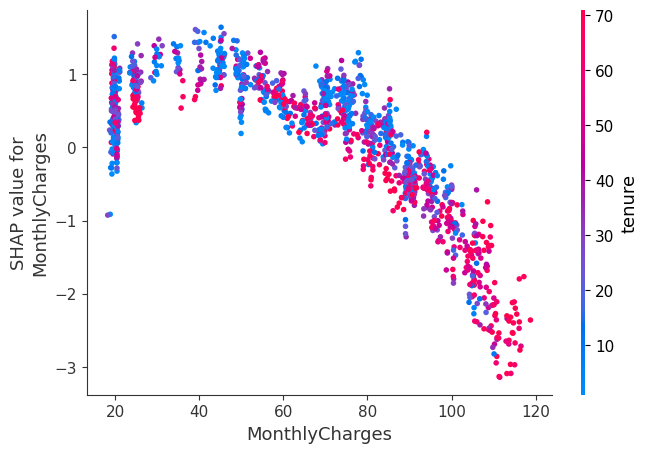

In [ ]:
shap.dependence_plot("MonthlyCharges", shap_values, X_test)


SHAP Dependence Plot (Gambar 3)

Plot ini menjelaskan hubungan antara MonthlyCharges dan risiko churn, dengan warna menunjukkan tenure.

Interpretasi:

A. Pola umum

Pada biaya bulanan rendah → SHAP dekat 0 atau negatif → tidak meningkatkan churn.

Saat biaya bulanan naik → SHAP naik → pelanggan lebih berisiko churn.

Tetapi pada titik tertentu (> ~80) SHAP mulai turun kembali → model menginterpretasikan sesuatu menarik.

B. Interaksi dengan tenure

Warna merah = tenure tinggi
Warna biru = tenure rendah

Pelanggan baru (biru) dengan biaya mahal memiliki SHAP jauh di area positif → risiko churn tinggi.

Pelanggan lama (merah) lebih stabil meskipun biaya mahal → banyak SHAP negatif.

➡ Kesimpulan interaksi:
Pelanggan baru + biaya mahal = kombinasi paling berisiko churn.

**10.6 Force Plot**

In [ ]:
shap.initjs()
i = 0  # ganti indeks customer
shap.force_plot(explainer.expected_value, shap_values[i], X_test.iloc[i])


SHAP – Individual Customer Prediction

Pada analisis ini, model XGBoost dikembangkan untuk memprediksi kemungkinan pelanggan melakukan churn. Setelah model mencapai performa optimal, analisis explainability dilakukan menggunakan SHAP untuk memahami bagaimana setiap fitur memengaruhi prediksi model, baik secara global maupun pada level individu.

Salah satu visualisasi penting adalah SHAP Force Plot, yang memberikan penjelasan terhadap prediksi model untuk satu pelanggan tertentu.

 Hasil Prediksi Individu

Model memberikan nilai prediksi sebesar –6.21 (log-odds), yang menunjukkan bahwa pelanggan ini memiliki probabilitas sangat rendah untuk melakukan churn. Dengan kata lain, model sangat yakin bahwa pelanggan ini akan tetap berlangganan.

Faktor-Faktor yang Menurunkan Risiko Churn (SHAP bernilai negatif)

Berbagai fitur memberikan kontribusi signifikan dalam menurunkan risiko churn. Beberapa di antaranya:

1. Contract_Two year = 1

Kontrak dua tahun merupakan faktor yang paling kuat mencegah churn. Pelanggan dengan jenis kontrak ini cenderung terikat secara finansial maupun administratif, sehingga potensi churn menjadi jauh lebih rendah.

2. InternetService_Fiber optic = 0

Pelanggan ini tidak menggunakan layanan fiber optic, yang dalam dataset cenderung menjadi kategori dengan churn rate tinggi. Kondisi ini berkontribusi positif terhadap loyalitas pelanggan.

3. PaymentMethod_Electronic check = 0

Metode pembayaran electronic check terbukti menjadi salah satu faktor dengan risiko churn tinggi. Karena pelanggan ini tidak menggunakan metode tersebut, risiko churn otomatis menurun.

Faktor yang Meningkatkan Risiko Churn (SHAP bernilai positif)
PaymentMethod_Credit card (automatic) = 1

Fitur ini sedikit meningkatkan risiko churn pada pelanggan, meskipun pengaruhnya relatif kecil dibandingkan faktor-faktor yang menurunkan risiko churn. Meski pembayaran otomatis biasanya berasosiasi dengan loyalitas, pola pada dataset menunjukkan bahwa sebagian pelanggan tetap meninggalkan layanan meski sudah otomatis dalam pembayaran.

Kesimpulan Utama

Secara keseluruhan, pelanggan ini memiliki fitur-fitur yang kuat dalam menahan churn.
Kontrak jangka panjang, metode pembayaran non–electronic check, serta tidak menggunakan layanan fiber optic merupakan faktor dominan yang membawa prediksi menuju kategori non-churn.

Analisis ini menunjukkan bagaimana SHAP membantu:

Menginterpretasikan perilaku model XGBoost secara transparan

Memahami driver churn pada tingkat individu

Memberikan wawasan yang bisa digunakan untuk strategi retensi pelanggan